# **Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# **Loading the nasa dataset**
### The NASA dataset (POWER Data) provides daily climate variables such as air temperature (T2M, T2M_MAX, T2M_MIN), surface pressure (PS), precipitation (PRECTOTCORR), relative humidity (RH2M), and wind speed (WS2M), recorded with respect to year (YEAR) and day of year (DOY). It represents continuous environmental conditions for the selected geographic location.

In [2]:
nasa_data = pd.read_csv("nasa(India).csv", skiprows=15)

In [3]:
nasa_data

,YEAR,DOY,T2M,T2M_MAX,T2M_MIN,PS,PRECTOTCORR,RH2M,WS2M
0,2000,1,14.71,25.48,6.45,96.95,0.0,47.71,1.29
1,2000,2,14.81,25.33,8.06,96.98,0.0,45.55,1.19
2,2000,3,14.11,24.56,5.99,96.87,0.0,45.66,1.41
3,2000,4,14.99,24.68,6.78,96.87,0.0,40.12,1.42
4,2000,5,14.72,24.38,8.34,96.94,0.0,40.66,1.43
...,...,...,...,...,...,...,...,...,...
9369,2025,238,26.37,30.50,22.89,95.77,3.4,88.24,1.35
9370,2025,239,-999.00,-999.00,24.22,-999.00,-999.0,87.10,0.92
9371,2025,240,-999.00,-999.00,-999.00,-999.00,-999.0,-999.00,-999.00
9372,2025,241,-999.00,-999.00,-999.00,-999.00,-999.0,-999.00,-999.00


In [4]:
nasa_data.replace(-999, np.nan, inplace=True)


In [5]:
nasa_data.dropna(inplace=True)

# **Summary of the nasa dataset**

In [6]:
nasa_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9370 entries, 0 to 9369
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         9370 non-null   int64  
 1   DOY          9370 non-null   int64  
 2   T2M          9370 non-null   float64
 3   T2M_MAX      9370 non-null   float64
 4   T2M_MIN      9370 non-null   float64
 5   PS           9370 non-null   float64
 6   PRECTOTCORR  9370 non-null   float64
 7   RH2M         9370 non-null   float64
 8   WS2M         9370 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 732.0 KB


# **descriptive statistics of the dataset**

In [7]:
nasa_data.describe()

,YEAR,DOY,T2M,T2M_MAX,T2M_MIN,PS,PRECTOTCORR,RH2M,WS2M
count,9370.000000,9370.000000,9370.000000,9370.000000,9370.000000,9370.000000,9370.000000,9370.000000,9370.000000
mean,2012.330203,181.523799,25.446551,32.481044,19.394017,96.285908,3.266472,53.661823,2.041480
std,7.407943,105.157252,6.313661,6.051775,6.753261,0.598379,8.727945,26.048495,0.949971
min,2000.000000,1.000000,8.790000,15.730000,1.430000,94.740000,0.000000,5.660000,0.510000
25%,2006.000000,91.000000,20.440000,28.410000,13.382500,95.760000,0.000000,28.745000,1.340000
50%,2012.000000,181.000000,26.010000,30.790000,21.150000,96.300000,0.000000,55.235000,1.750000
75%,2019.000000,272.000000,29.380000,36.850000,24.560000,96.820000,1.797500,78.727500,2.517500
max,2025.000000,366.000000,40.220000,47.700000,34.030000,97.620000,121.210000,95.650000,7.490000


# **Checking for the null values**

In [8]:
nasa_data.isnull().sum()

YEAR           0
DOY            0
T2M            0
T2M_MAX        0
T2M_MIN        0
PS             0
PRECTOTCORR    0
RH2M           0
WS2M           0
dtype: int64

# **Checking for the duplicated values**

In [9]:
nasa_data.duplicated().sum()

0

# **Loading the EMD-DAT data**
### The EM-DAT dataset (Emergency Events Database) contains historical disaster records, including event details such as disaster group, type, subtype, location, country, start and end dates, and socio-economic impacts (e.g., Total Deaths, Total Affected, Total Damage, Insured Damage). It provides structured information on disaster occurrences and their consequences.

In [10]:
emd_data = pd.read_excel("EMD_data.xlsx")

In [11]:
emd_data

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2000-0332-IND,No,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,NaN,NaN,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm2_code"":17582,""adm2_name"":""Golaghat""},{""...",2005-09-15,2023-09-25
1,2000-0444-IND,No,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,NaN,NaN,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm2_code"":70041,""adm2_name"":""Administrativ...",2003-07-01,2023-09-25
2,2000-0445-IND,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,IND,...,NaN,NaN,NaN,NaN,43000.0,78331.0,54.895152,"[{""adm1_code"":1485,""adm1_name"":""Andhra Pradesh...",2008-01-03,2023-09-25
3,2000-0534-IND,No,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,NaN,NaN,IND,...,NaN,NaN,NaN,NaN,173000.0,315146.0,54.895152,"[{""adm2_code"":17547,""adm2_name"":""Adilabad""},{""...",2006-02-23,2023-09-25
4,2000-0610-IND,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,IND,...,NaN,NaN,NaN,NaN,691500.0,1259674.0,54.895152,"[{""adm2_code"":17946,""adm2_name"":""Barddhaman""},...",2005-09-15,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,2024-0624-IND,No,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,NaN,NaN,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,2024-08-23,2024-10-22
197,2024-0647-IND,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,2024-08-29,2024-10-22
198,2024-0719-IND,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,2024-10-09,2024-10-28
199,2025-0402-IND,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-06-02,2025-07-14


# **Summary of the EMD-DAT dataset**

In [12]:
emd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     201 non-null    object 
 1   Historic                                   201 non-null    object 
 2   Classification Key                         201 non-null    object 
 3   Disaster Group                             201 non-null    object 
 4   Disaster Subgroup                          201 non-null    object 
 5   Disaster Type                              201 non-null    object 
 6   Disaster Subtype                           201 non-null    object 
 7   External IDs                               50 non-null     object 
 8   Event Name                                 0 non-null      float64
 9   ISO                                        201 non-null    object 
 10  Country                   

# **descriptive statistics of the dataset**

In [13]:
emd_data.describe()

,Event Name,AID Contribution ('000 US$),Magnitude,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,...,No. Affected,No. Homeless,Total Affected,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI
count,0.0,11.000000,86.000000,63.000000,63.00000,201.000000,201.000000,188.000000,201.000000,201.000000,...,1.440000e+02,1.900000e+01,1.680000e+02,0.0,0.0,11.000000,1.100000e+01,6.900000e+01,6.900000e+01,199.000000
mean,NaN,11383.181818,116376.518721,22.385694,82.45819,2011.064677,7.502488,15.611702,2011.064677,7.985075,...,2.531549e+06,5.464788e+05,2.231749e+06,NaN,NaN,362272.727273,5.052518e+05,1.115237e+06,1.488609e+06,71.425465
std,NaN,27199.756461,133126.072799,6.799626,7.25669,6.897159,1.743916,8.953431,6.897159,1.792980,...,6.230064e+06,1.076436e+06,5.829008e+06,NaN,NaN,314930.179852,4.476813e+05,2.518931e+06,3.264191e+06,10.983296
min,NaN,12.000000,309.000000,9.880000,70.76000,2000.000000,2.000000,1.000000,2000.000000,2.000000,...,5.000000e+00,4.500000e+02,4.000000e+00,NaN,NaN,44000.000000,5.750800e+04,2.000000e+03,2.650000e+03,54.895152
25%,NaN,1338.000000,35595.000000,17.542000,76.73000,2006.000000,6.000000,8.750000,2006.000000,7.000000,...,1.445775e+04,3.525000e+03,1.000000e+04,NaN,NaN,114000.000000,1.492895e+05,4.300000e+04,7.833100e+04,63.260655
50%,NaN,3470.000000,69739.060000,22.630000,80.34000,2010.000000,7.000000,16.000000,2010.000000,8.000000,...,2.000000e+05,5.100000e+04,1.000000e+05,NaN,NaN,200000.000000,2.505760e+05,1.630000e+05,2.159840e+05,69.513293
75%,NaN,5826.000000,137012.125000,26.981300,88.41500,2017.000000,9.000000,23.000000,2017.000000,9.000000,...,1.928000e+06,3.260000e+05,1.751500e+06,NaN,NaN,627500.000000,8.214530e+05,6.915000e+05,1.259674e+06,78.141002
max,NaN,93065.000000,629961.600000,34.610000,95.60700,2025.000000,12.000000,31.000000,2025.000000,12.000000,...,4.200000e+07,4.000000e+06,4.200000e+07,NaN,NaN,844000.000000,1.355682e+06,1.600000e+07,2.120091e+07,100.000000


# **Creating seperate date column in the nasa dataset**

In [14]:
nasa_data['DATE'] = pd.to_datetime(nasa_data['YEAR'].astype(str), format='%Y') + \
                  pd.to_timedelta(nasa_data['DOY'] - 1, unit='D')


In [15]:
nasa_data

,YEAR,DOY,T2M,T2M_MAX,T2M_MIN,PS,PRECTOTCORR,RH2M,WS2M,DATE
0,2000,1,14.71,25.48,6.45,96.95,0.00,47.71,1.29,2000-01-01
1,2000,2,14.81,25.33,8.06,96.98,0.00,45.55,1.19,2000-01-02
2,2000,3,14.11,24.56,5.99,96.87,0.00,45.66,1.41,2000-01-03
3,2000,4,14.99,24.68,6.78,96.87,0.00,40.12,1.42,2000-01-04
4,2000,5,14.72,24.38,8.34,96.94,0.00,40.66,1.43,2000-01-05
...,...,...,...,...,...,...,...,...,...,...
9365,2025,234,24.87,28.69,22.98,95.60,11.36,90.91,3.55,2025-08-22
9366,2025,235,24.55,27.27,23.07,95.47,8.44,92.51,3.55,2025-08-23
9367,2025,236,24.61,26.92,22.94,95.55,9.96,92.18,3.77,2025-08-24
9368,2025,237,25.18,28.42,23.06,95.65,3.91,90.67,2.96,2025-08-25


# **Aggregating NASA daily data into yearly summaries**

In [16]:
df1_nasa=nasa_data.groupby("DATE").agg({
    "T2M": "mean",             # average annual temperature
    "T2M_MAX": "mean",         # average of daily max temps
    "T2M_MIN": "mean",         # average of daily min temps
    "PS": "mean",              # average surface pressure
    "PRECTOTCORR": "sum",      # total annual precipitation
    "RH2M": "mean",            # average humidity
    "WS2M": "mean"             # average wind speed
}).reset_index()


In [17]:
df1_nasa

,DATE,T2M,T2M_MAX,T2M_MIN,PS,PRECTOTCORR,RH2M,WS2M
0,2000-01-01,14.71,25.48,6.45,96.95,0.00,47.71,1.29
1,2000-01-02,14.81,25.33,8.06,96.98,0.00,45.55,1.19
2,2000-01-03,14.11,24.56,5.99,96.87,0.00,45.66,1.41
3,2000-01-04,14.99,24.68,6.78,96.87,0.00,40.12,1.42
4,2000-01-05,14.72,24.38,8.34,96.94,0.00,40.66,1.43
...,...,...,...,...,...,...,...,...
9365,2025-08-22,24.87,28.69,22.98,95.60,11.36,90.91,3.55
9366,2025-08-23,24.55,27.27,23.07,95.47,8.44,92.51,3.55
9367,2025-08-24,24.61,26.92,22.94,95.55,9.96,92.18,3.77
9368,2025-08-25,25.18,28.42,23.06,95.65,3.91,90.67,2.96


# **Checking for the null values**

In [18]:
df1_nasa.isnull().sum()

DATE           0
T2M            0
T2M_MAX        0
T2M_MIN        0
PS             0
PRECTOTCORR    0
RH2M           0
WS2M           0
dtype: int64

# **Checking for the duplicated values**

In [19]:
df1_nasa.duplicated().sum()

0

# **Creating date column in the EMD-DAT dataset**

In [20]:
emd_data['Start Day'] = emd_data['Start Day'].fillna(1)   # assume 1st of the month
emd_data['Start Month'] = emd_data['Start Month'].fillna(1)  # assume January if missing
emd_data['DATE'] = pd.to_datetime(dict(
    year=emd_data['Start Year'],
    month=emd_data['Start Month'],
    day=emd_data['Start Day']
))


# **Adding the flood labels to nasa dataset**

In [21]:
flood_dates = emd_data[emd_data['Disaster Type'] == 'Flood']['DATE'].dt.date.unique()

# Create Flood label column (1 if date matches flood date, else 0)
df1_nasa['Flood'] = df1_nasa['DATE'].dt.date.isin(flood_dates).astype(int)


# **Updated NASA dataset along with flood labels**

In [22]:
df1_nasa

,DATE,T2M,T2M_MAX,T2M_MIN,PS,PRECTOTCORR,RH2M,WS2M,Flood
0,2000-01-01,14.71,25.48,6.45,96.95,0.00,47.71,1.29,0
1,2000-01-02,14.81,25.33,8.06,96.98,0.00,45.55,1.19,0
2,2000-01-03,14.11,24.56,5.99,96.87,0.00,45.66,1.41,0
3,2000-01-04,14.99,24.68,6.78,96.87,0.00,40.12,1.42,0
4,2000-01-05,14.72,24.38,8.34,96.94,0.00,40.66,1.43,0
...,...,...,...,...,...,...,...,...,...
9365,2025-08-22,24.87,28.69,22.98,95.60,11.36,90.91,3.55,0
9366,2025-08-23,24.55,27.27,23.07,95.47,8.44,92.51,3.55,0
9367,2025-08-24,24.61,26.92,22.94,95.55,9.96,92.18,3.77,0
9368,2025-08-25,25.18,28.42,23.06,95.65,3.91,90.67,2.96,0


In [23]:
df1_nasa['Flood'].value_counts()

Flood
0    9178
1     192
Name: count, dtype: int64

# **Keeping only necessary columns in the EMD-DAT dataset**

In [24]:
emd_india = emd_data[[
    "DisNo.", "Disaster Group", "Disaster Type","Disaster Subtype", "Location",
    "DATE", "Total Deaths", "Total Affected",
]]


# **Checking for the null values**

In [25]:
emd_india.isnull().sum()

DisNo.               0
Disaster Group       0
Disaster Type        0
Disaster Subtype     0
Location             0
DATE                 0
Total Deaths        13
Total Affected      33
dtype: int64

# **Filling the missing values**

In [26]:
emd_india['Total Deaths']=emd_india['Total Deaths'].fillna(emd_india['Total Deaths'].median())

C:\Users\rajuj\AppData\Local\Temp\ipykernel_29156\1456041930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emd_india['Total Deaths']=emd_india['Total Deaths'].fillna(emd_india['Total Deaths'].median())


In [27]:
emd_india['Total Affected']=emd_india['Total Affected'].fillna(emd_india['Total Affected'].median())

C:\Users\rajuj\AppData\Local\Temp\ipykernel_29156\204070498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emd_india['Total Affected']=emd_india['Total Affected'].fillna(emd_india['Total Affected'].median())


# **Checking for the null values**

In [28]:
emd_india.isnull().sum()

DisNo.              0
Disaster Group      0
Disaster Type       0
Disaster Subtype    0
Location            0
DATE                0
Total Deaths        0
Total Affected      0
dtype: int64

# **Checking for the duplicated values**

In [29]:
emd_india.duplicated().sum()

0

In [30]:
emd_india

,DisNo.,Disaster Group,Disaster Type,Disaster Subtype,Location,DATE,Total Deaths,Total Affected
0,2000-0332-IND,Natural,Flood,Flash flood,"Yingkiang,Tuting villages (Upper Siang (70051)...",2000-06-10,20.0,3000000.0
1,2000-0444-IND,Natural,Flood,Flash flood,"East Siang, 70041, West Siang, 70054, Upper Si...",2000-07-01,130.0,100000.0
2,2000-0445-IND,Natural,Flood,Riverine flood,"Katihar, Sitamarhi districts (Bihar province),...",2000-08-02,867.0,22000000.0
3,2000-0534-IND,Natural,Flood,Flash flood,"Adilabad, Cuddapah, East Godavari, Guntur, Hyd...",2000-08-23,179.0,252016.0
4,2000-0610-IND,Natural,Flood,Riverine flood,"Birbhum, Bardhaman, Murshidabad, Maldah distri...",2000-09-18,884.0,24600000.0
...,...,...,...,...,...,...,...,...
196,2024-0624-IND,Natural,Flood,Flash flood,Tripura state,2024-08-19,26.0,1700000.0
197,2024-0647-IND,Natural,Flood,Flood (General),"Gujarat, Maharashtra, Tripura States",2024-08-26,25.0,8007173.0
198,2024-0719-IND,Natural,Flood,Flood (General),Meghalaya,2024-10-04,15.0,100000.0
199,2025-0402-IND,Natural,Flood,Flood (General),"Assam, Arunachal Pradesh, Mizoram, Manipur, Si...",2025-05-31,50.0,1441247.0


# **Merging the NASA and EMD-DAT datasets**
### After merging the EM-DAT disaster dataset with the NASA climate dataset, the resulting data links disaster events with their corresponding daily climate conditions. Each disaster entry from EM-DAT (with details like type, location, total deaths, and people affected) is now matched with NASA’s environmental variables for the same date (temperature, rainfall, humidity, wind speed, etc.). This combined dataset enables deeper analysis of how specific climate factors might relate to the occurrence, severity, and impacts of disasters.

In [31]:
merged = pd.merge(
    df1_nasa,       # climate dataset
    emd_india,        # disaster dataset
    on="DATE",     # common column
    how="left"    
)


In [32]:
merged

,DATE,T2M,T2M_MAX,T2M_MIN,PS,PRECTOTCORR,RH2M,WS2M,Flood,DisNo.,Disaster Group,Disaster Type,Disaster Subtype,Location,Total Deaths,Total Affected
0,2000-01-01,14.71,25.48,6.45,96.95,0.00,47.71,1.29,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-02,14.81,25.33,8.06,96.98,0.00,45.55,1.19,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-03,14.11,24.56,5.99,96.87,0.00,45.66,1.41,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-04,14.99,24.68,6.78,96.87,0.00,40.12,1.42,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-05,14.72,24.38,8.34,96.94,0.00,40.66,1.43,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,2025-08-22,24.87,28.69,22.98,95.60,11.36,90.91,3.55,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9375,2025-08-23,24.55,27.27,23.07,95.47,8.44,92.51,3.55,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9376,2025-08-24,24.61,26.92,22.94,95.55,9.96,92.18,3.77,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9377,2025-08-25,25.18,28.42,23.06,95.65,3.91,90.67,2.96,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Filling the null values**

In [33]:
## Categorical Data
cat_cols = ["DisNo.","Location","Disaster Group","Disaster Type", "Disaster Subtype"]
merged[cat_cols] = merged[cat_cols].fillna("0")


In [34]:
merged.drop(columns=["Total Deaths","Total Affected"],axis=1,inplace=True)


# **Final Merged Dataset**

In [35]:
merged

,DATE,T2M,T2M_MAX,T2M_MIN,PS,PRECTOTCORR,RH2M,WS2M,Flood,DisNo.,Disaster Group,Disaster Type,Disaster Subtype,Location
0,2000-01-01,14.71,25.48,6.45,96.95,0.00,47.71,1.29,0,0,0,0,0,0
1,2000-01-02,14.81,25.33,8.06,96.98,0.00,45.55,1.19,0,0,0,0,0,0
2,2000-01-03,14.11,24.56,5.99,96.87,0.00,45.66,1.41,0,0,0,0,0,0
3,2000-01-04,14.99,24.68,6.78,96.87,0.00,40.12,1.42,0,0,0,0,0,0
4,2000-01-05,14.72,24.38,8.34,96.94,0.00,40.66,1.43,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,2025-08-22,24.87,28.69,22.98,95.60,11.36,90.91,3.55,0,0,0,0,0,0
9375,2025-08-23,24.55,27.27,23.07,95.47,8.44,92.51,3.55,0,0,0,0,0,0
9376,2025-08-24,24.61,26.92,22.94,95.55,9.96,92.18,3.77,0,0,0,0,0,0
9377,2025-08-25,25.18,28.42,23.06,95.65,3.91,90.67,2.96,0,0,0,0,0,0


# **Checking for the null values of the merged dataset**

In [36]:
merged.isnull().sum()

DATE                0
T2M                 0
T2M_MAX             0
T2M_MIN             0
PS                  0
PRECTOTCORR         0
RH2M                0
WS2M                0
Flood               0
DisNo.              0
Disaster Group      0
Disaster Type       0
Disaster Subtype    0
Location            0
dtype: int64

# **Checking for the duplicated values**

In [37]:
merged.duplicated().sum()

0

# **Summary of the merged dataset**

In [38]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9379 entries, 0 to 9378
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              9379 non-null   datetime64[ns]
 1   T2M               9379 non-null   float64       
 2   T2M_MAX           9379 non-null   float64       
 3   T2M_MIN           9379 non-null   float64       
 4   PS                9379 non-null   float64       
 5   PRECTOTCORR       9379 non-null   float64       
 6   RH2M              9379 non-null   float64       
 7   WS2M              9379 non-null   float64       
 8   Flood             9379 non-null   int32         
 9   DisNo.            9379 non-null   object        
 10  Disaster Group    9379 non-null   object        
 11  Disaster Type     9379 non-null   object        
 12  Disaster Subtype  9379 non-null   object        
 13  Location          9379 non-null   object        
dtypes: datetime64[ns](1), fl

# **descriptive statistics of the dataset**

In [39]:
merged.describe()

,DATE,T2M,T2M_MAX,T2M_MIN,PS,PRECTOTCORR,RH2M,WS2M,Flood
count,9379,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000
mean,2012-10-28 02:47:30.367843072,25.451088,32.483265,19.400030,96.285280,3.269099,53.673049,2.042369,0.021431
min,2000-01-01 00:00:00,8.790000,15.730000,1.430000,94.740000,0.000000,5.660000,0.510000,0.000000
25%,2006-05-31 12:00:00,20.450000,28.410000,13.390000,95.760000,0.000000,28.775000,1.340000,0.000000
50%,2012-10-27 00:00:00,26.010000,30.790000,21.160000,96.300000,0.000000,55.240000,1.750000,0.000000
75%,2019-03-28 12:00:00,29.395000,36.855000,24.560000,96.820000,1.800000,78.730000,2.520000,0.000000
max,2025-08-26 00:00:00,40.220000,47.700000,34.030000,97.620000,121.210000,95.650000,7.490000,1.000000
std,NaN,6.313527,6.051697,6.753097,0.598547,8.726828,26.048581,0.951005,0.144823


# **Heatmap**

<Axes: >

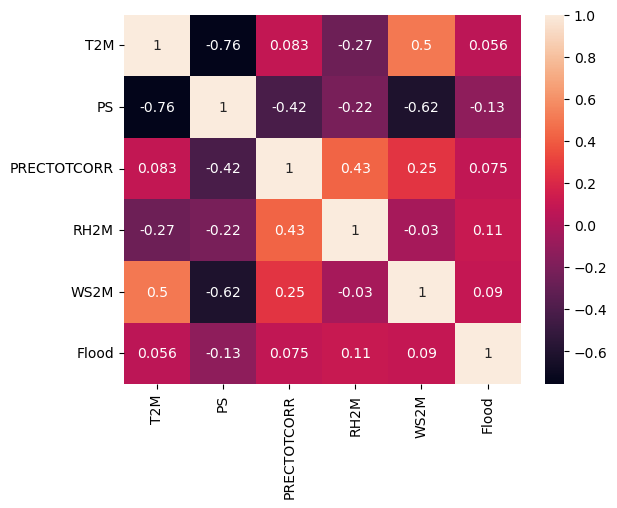

In [40]:
merged.drop(columns=['T2M_MAX','T2M_MIN'],inplace=True)
corr_matrix=merged.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix,annot=True)

# **Boxplots for checking any outliers**

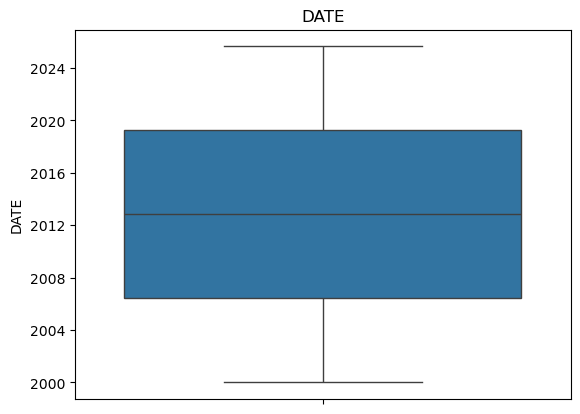

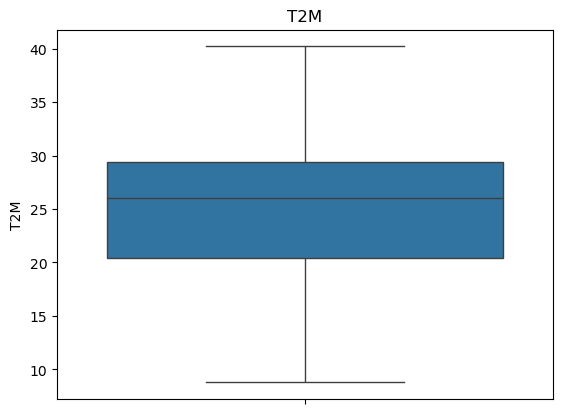

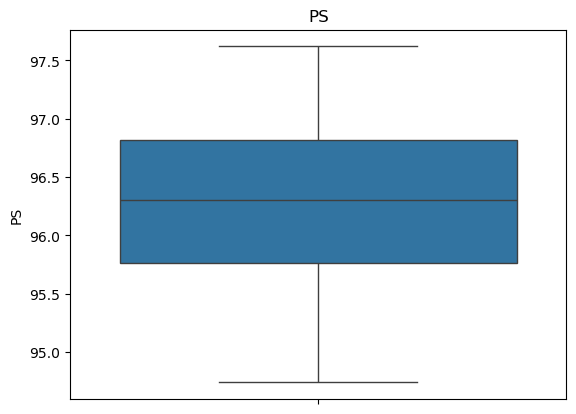

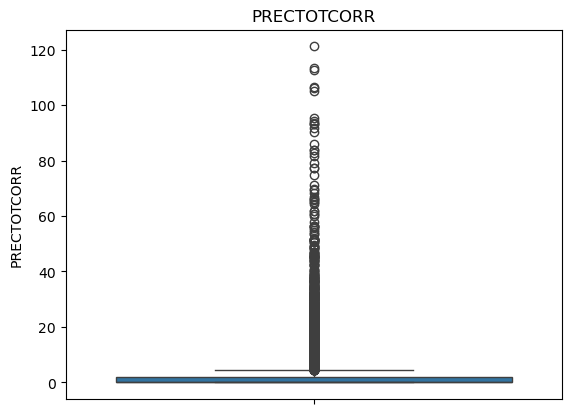

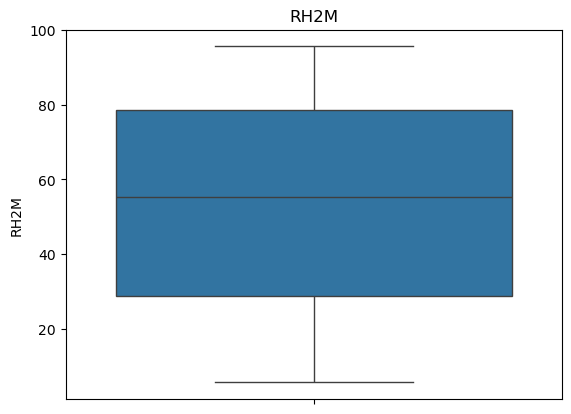

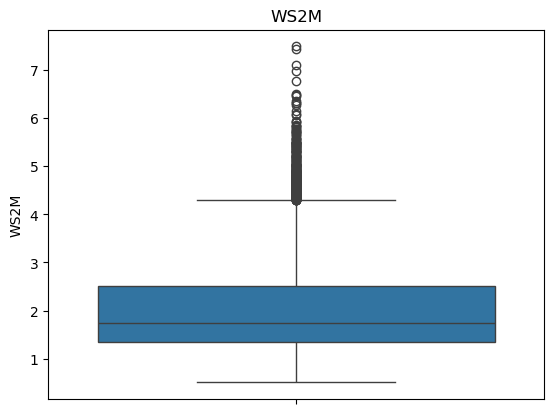

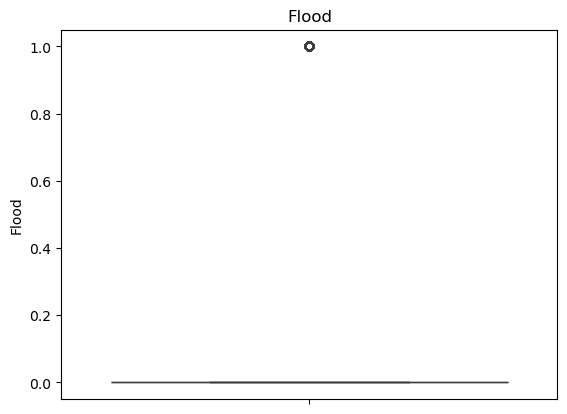

In [83]:
for i in merged.columns:
    if merged[i].dtype!='object':
        sns.boxplot(merged[i])
        plt.title(i)
        plt.show()

# **Bar plot for flood vs non flood**

<Axes: xlabel='Flood'>

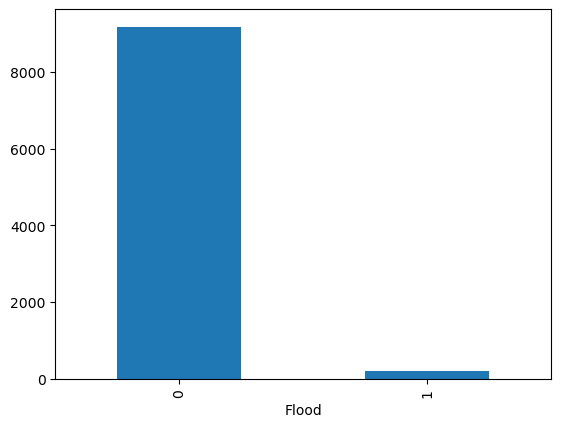

In [84]:
merged['Flood'].value_counts().plot(kind='bar')


# **Subplots**

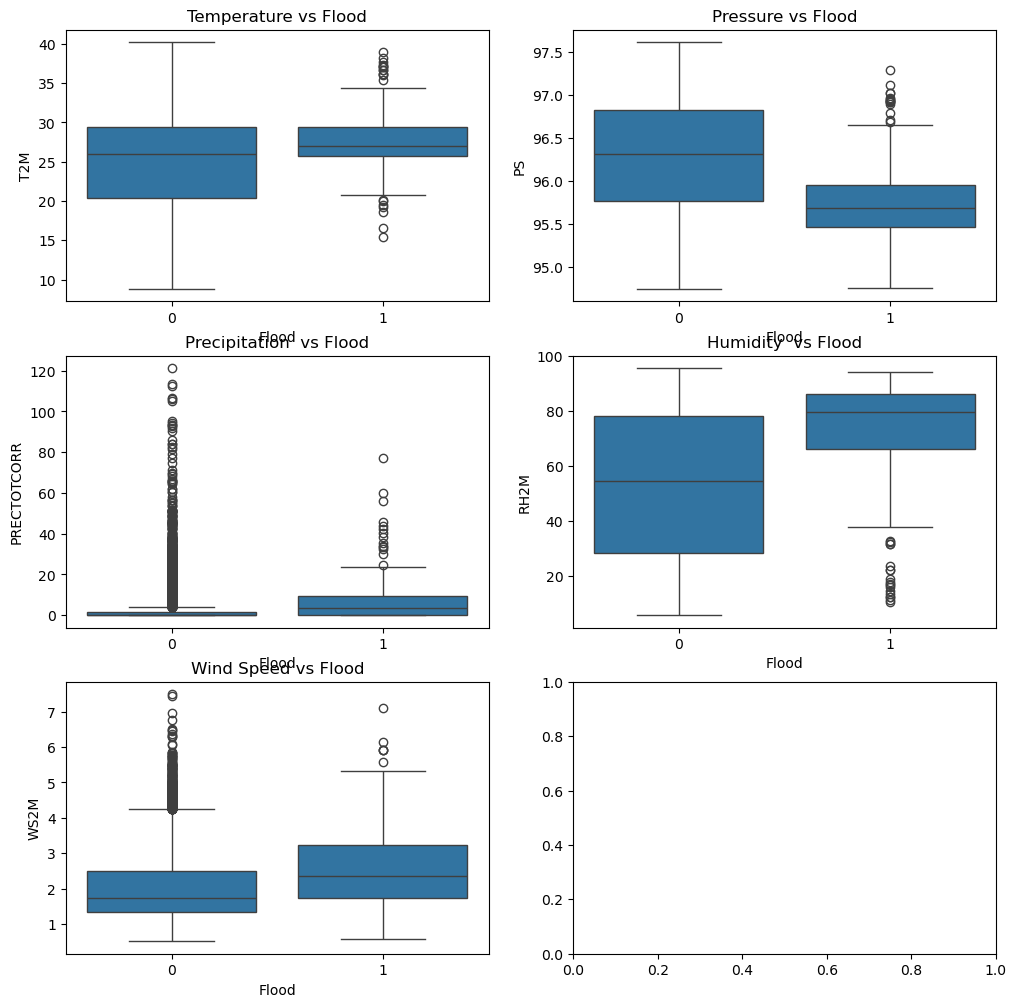

In [51]:
fig,axs=plt.subplots(3,2,figsize=(12,12))
sns.boxplot(data=merged,y='T2M',x='Flood',ax=axs[0,0])
axs[0,0].set_title("Temperature vs Flood")


sns.boxplot(data=merged,y='PS',x='Flood',ax=axs[0,1])
axs[0,1].set_title("Pressure vs Flood")


sns.boxplot(data=merged,y='PRECTOTCORR',x='Flood',ax=axs[1,0])
axs[1,0].set_title("Precipitation  vs Flood")


sns.boxplot(data=merged,y='RH2M',x='Flood',ax=axs[1,1])
axs[1,1].set_title("Humidity  vs Flood")


sns.boxplot(data=merged,y='WS2M',x='Flood',ax=axs[2,0])
axs[2,0].set_title("Wind Speed vs Flood")
plt.show()

In [52]:
merged['DATE'] = pd.to_datetime(merged['DATE'])


In [53]:
merged['Year'] = merged['DATE'].dt.year
merged['Month'] = merged['DATE'].dt.month
merged['Season'] = merged['Month']%12 // 3 + 1  # 1=Winter, 2=Summer, 3=Monsoon, 4=Post-Monsoon


# **Countplot for flood occurances by month and seasons**

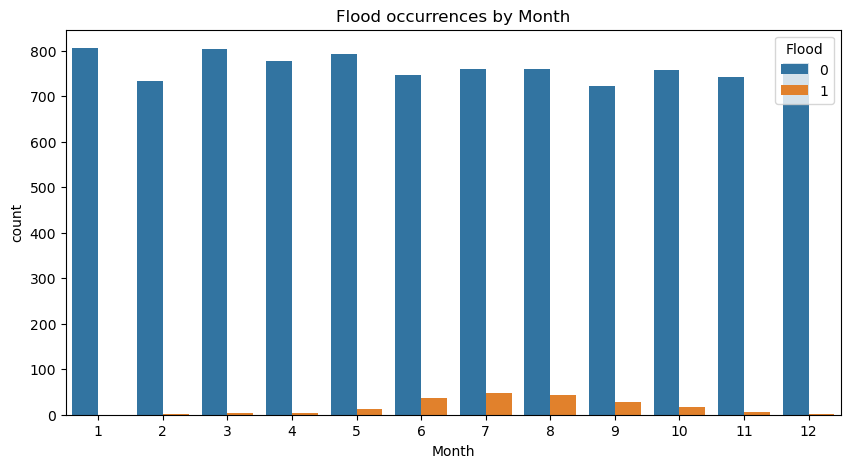

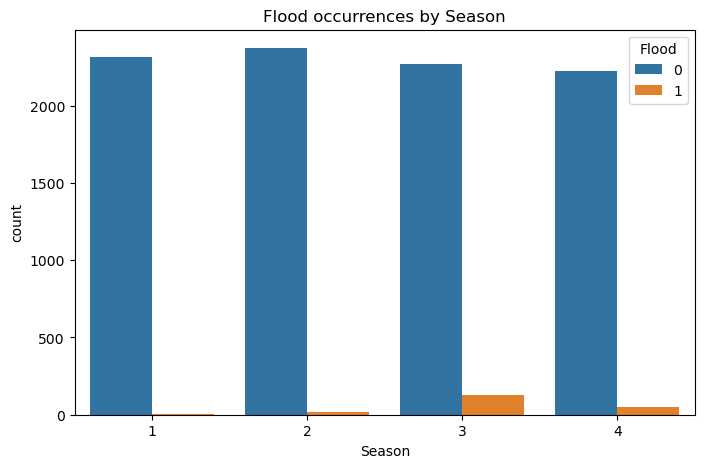

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Flood count by month
plt.figure(figsize=(10,5))
sns.countplot(data=merged, x='Month', hue='Flood')
plt.title("Flood occurrences by Month")
plt.show()

# Flood count by season
plt.figure(figsize=(8,5))
sns.countplot(data=merged, x='Season', hue='Flood')
plt.title("Flood occurrences by Season")
plt.show()


# **Line plot for yearly flood occurances**

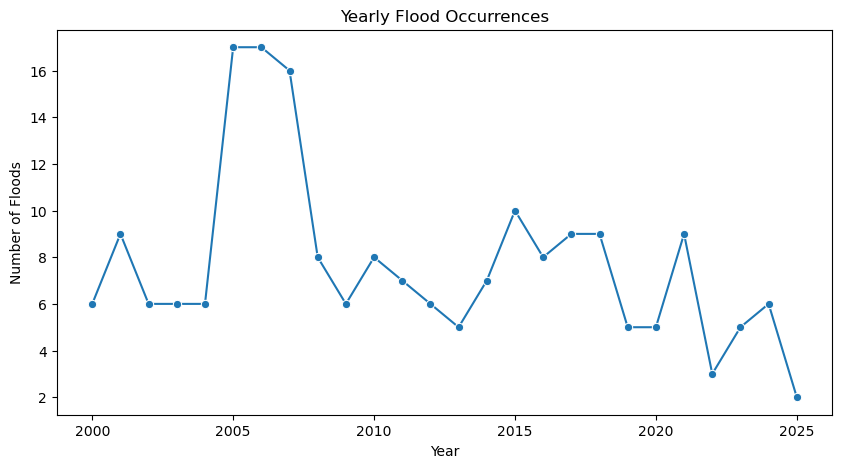

In [56]:
yearly = merged.groupby('Year')['Flood'].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=yearly.index, y=yearly.values, marker="o")
plt.title("Yearly Flood Occurrences")
plt.xlabel("Year")
plt.ylabel("Number of Floods")
plt.show()


# **Standard Scaling**

In [41]:
X = merged.drop(['Flood','DATE'], axis=1)

# Select numeric features again (should now be more than before)
X = X.select_dtypes(include=['int64','float64'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = merged['Flood']


In [42]:
X

,T2M,PS,PRECTOTCORR,RH2M,WS2M
0,14.71,96.95,0.00,47.71,1.29
1,14.81,96.98,0.00,45.55,1.19
2,14.11,96.87,0.00,45.66,1.41
3,14.99,96.87,0.00,40.12,1.42
4,14.72,96.94,0.00,40.66,1.43
...,...,...,...,...,...
9374,24.87,95.60,11.36,90.91,3.55
9375,24.55,95.47,8.44,92.51,3.55
9376,24.61,95.55,9.96,92.18,3.77
9377,25.18,95.65,3.91,90.67,2.96


In [44]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9374    0
9375    0
9376    0
9377    0
9378    0
Name: Flood, Length: 9379, dtype: int32

# **Training and splitting the model**

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


# **Using the SMOTE**

In [54]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [55]:
X_train_res

array([[-8.80868015e-01,  1.31111241e+00, -3.74623333e-01,
         9.31751350e-02, -7.17562671e-01],
       [ 1.95921738e+00, -1.59608410e+00, -3.74623333e-01,
        -1.64213668e+00, -2.86416704e-01],
       [ 1.36680693e+00, -9.61179114e-01, -3.65455711e-01,
        -4.50069603e-01,  2.28855305e-01],
       ...,
       [-1.46861352e-03, -1.96416444e+00,  8.22892615e+00,
         1.43671854e+00,  1.68435357e+00],
       [-6.37647404e-02, -7.35258848e-01,  3.60884800e-01,
         1.46907187e+00,  2.06963543e+00],
       [ 4.58497091e-01, -1.36291905e+00,  9.36212165e-01,
         8.56373906e-01,  1.13221077e+00]])

In [56]:
y_train_res

0        0
1        0
2        1
3        0
4        0
        ..
14679    1
14680    1
14681    1
14682    1
14683    1
Name: Flood, Length: 14684, dtype: int32

# **Training the model**

### **Using Logistic Regression**

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg.fit(X_train_res, y_train_res)

y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.61      0.76      1836
           1       0.04      0.80      0.08        40

    accuracy                           0.61      1876
   macro avg       0.52      0.71      0.42      1876
weighted avg       0.97      0.61      0.74      1876

[[1120  716]
 [   8   32]]


### **Using Random forest classifier**

In [58]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1836
           1       0.05      0.17      0.08        40

    accuracy                           0.91      1876
   macro avg       0.52      0.55      0.52      1876
weighted avg       0.96      0.91      0.93      1876

[[1702  134]
 [  33    7]]


## **Precision-Recall Curve**

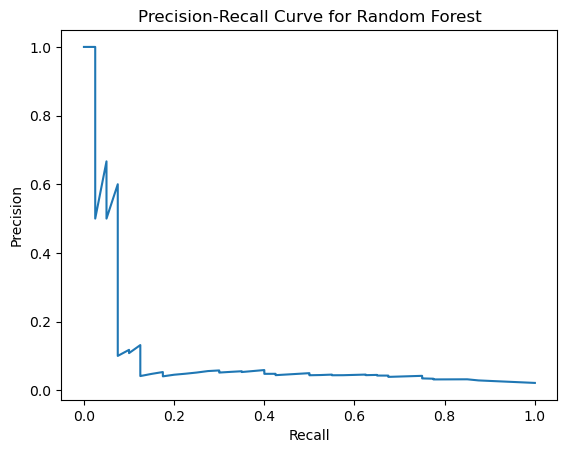

In [59]:
y_proba_rf = rf.predict_proba(X_test)[:,1]

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_proba_rf)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Random Forest")
plt.show()


### **Using  XGBClassifier**

In [86]:
best_xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='aucpr',  # instead of logloss
    scale_pos_weight=scale_pos_weight,
    colsample_bytree=1.0,
    learning_rate=0.05,
    max_depth=5,
    n_estimators=500,
    subsample=0.8,
    random_state=42
)
best_xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [77]:
y_proba_aucpr = best_xgb.predict_proba(X_test)[:, 1]


In [78]:
y_proba_aucpr 


array([0.06313343, 0.00654227, 0.02415065, ..., 0.00039651, 0.3803092 ,
       0.00076946], dtype=float32)

## **Precision-Recall Curve**

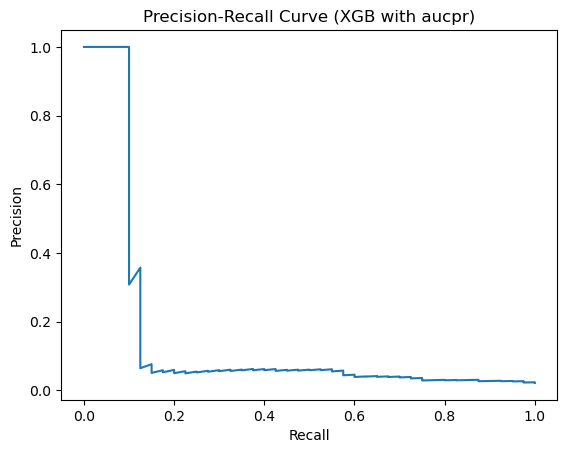

In [79]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_proba_aucpr)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (XGB with aucpr)")
plt.show()


🔹 Best threshold by F1: 0.7629848
Precision: 0.35714285714285715
Recall: 0.125
F1 Score: 0.18518480109819033

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1836
           1       0.36      0.12      0.19        40

    accuracy                           0.98      1876
   macro avg       0.67      0.56      0.59      1876
weighted avg       0.97      0.98      0.97      1876

Confusion Matrix:
 [[1827    9]
 [  35    5]]


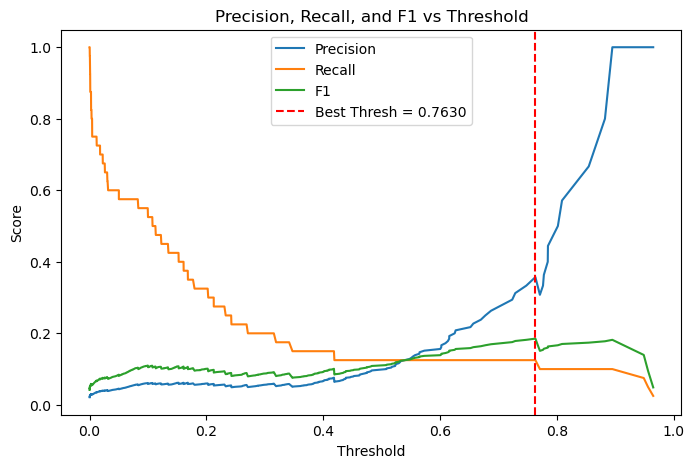

In [87]:
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix

# Get precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_aucpr)

# Compute F1 for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)

# Best threshold = threshold that maximizes F1
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print("🔹 Best threshold by F1:", best_threshold)
print("Precision:", precision[best_idx])
print("Recall:", recall[best_idx])
print("F1 Score:", f1_scores[best_idx])

# Apply the chosen threshold
y_pred_best = (y_proba_aucpr >= best_threshold).astype(int)

# Final evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

# Optional: plot to visualize
plt.figure(figsize=(8,5))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.plot(thresholds, f1_scores[:-1], label="F1")
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f"Best Thresh = {best_threshold:.4f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision, Recall, and F1 vs Threshold")
plt.show()
